# Analysis of tblXDiagResults

This notebook contains codes and functions to run queries to analyze the data present in the table `xspoc.xdiagresults` in the `oasis-dev` Database.

In [7]:
"""
For setting up local imports in an Ipython Shell
This is a workaround for ipython, dont need it for basic python scripts
"""
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [8]:
import pandas as pd
import numpy as np
import struct
import matplotlib.pyplot as plt

# Project Library
from library.lib_aws import PostgresRDS

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)

## Queries

Uee the `run_query` functions to run queries. Check `Analysis.md` for some examples.

In [9]:
database = 'oasis-dev'
#table = 'xspoc.xdiagresults'

## xdiagresults

In [10]:
query = """SELECT DISTINCT "NodeID" from xspoc.xdiagresults ORDER BY "NodeID";"""  # Unique well names in the data

cols_query = """
SELECT attname            AS col
     , atttypid::regtype  AS datatype
       -- more attributes?
FROM   pg_attribute
WHERE  attrelid = 'xspoc.xdiagresults'::regclass  -- table name, optionally schema-qualified
AND    attnum > 0
AND    NOT attisdropped
ORDER  BY attnum;
"""

with PostgresRDS(db=database) as engine:  
    well_list_full = pd.read_sql(query, engine)
    col_list_full = pd.read_sql(cols_query, engine)

Connected to oasis-dev DataBase
Connection Closed


In [6]:
print("List of Columns")
display(col_list_full)

print('\nList of wells')
display(well_list_full)

List of Columns


,col,datatype
0,NodeID,text
1,Date,timestamp without time zone
2,PumpCond1,text
3,PumpCond2,text
4,FillagePct,bigint
5,NetProd,double precision
6,FluidLevelXDiag,double precision
7,ElecCostPerBO,double precision
8,ElecCostMinTorquePerBO,double precision
9,ElectCostMinEnergyPerBO,double precision



List of wells


,NodeID
0,Bonner 9-12H
1,Bonner 9X-12HA
2,Bonner 9X-12HB
3,Cade 12-19HA
4,Cade 12-19HB
5,Cade 12X-19H
6,Cook 12-13 6B
7,Cook 12-13 7T
8,Cook 12-13 9T
9,Cook 41-12 11T


## Exploring

Select either the well specific query or the well list query to get the appropriate data. Specify the columns as needed.

In [11]:
# Add columns within the query itself
# Select only one of the query section below, and comment the other

# WELL SPECIFIC QUERY
well_name = 'Cook 12-13 7T'

query = """
SELECT
"NodeID",
"Date",
"TubingPressure",
"CasingPressure",
"PPRL",
"MPRL"
FROM xspoc.xdiagresults
WHERE "NodeID" = '{}'
ORDER BY "Date"
""".format(well_name)

# # WELL LIST QUERY
# well_list = [
#     'Bonner 9-12H',
#     'Bonner 9X-12HA',
#     'Bonner 9X-12HB' 
# ]
# query = """
# SELECT
# "NodeID",
# "Date",
# "TubingPressure",
# "CasingPressure",
# "PPRL",
# "MPRL"
# FROM xspoc.xdiagresults
# WHERE "NodeID" in {}
# ORDER BY "Date"
# """.format(tuple(well_list))


In [12]:
# Connecting to the DB (from the lib_aws.PostgresRDS Class in the folder library)
# Use th help command (or Shift + tab) for documentation
with PostgresRDS(db=database) as engine:  
    data = pd.read_sql(query, engine, parse_dates=['Date'])

display(data.head())

display(data.describe())

Connected to oasis-dev DataBase
Connection Closed


,NodeID,Date,TubingPressure,CasingPressure,PPRL,MPRL
0,Cook 12-13 7T,2019-05-28 02:07:32,234,192,35761.0,21915.0
1,Cook 12-13 7T,2019-05-28 02:25:01,228,184,38293.0,19877.0
2,Cook 12-13 7T,2019-05-28 08:19:07,155,103,35644.0,21505.0
3,Cook 12-13 7T,2019-05-28 08:36:37,155,103,38487.0,19624.0
4,Cook 12-13 7T,2019-05-28 15:18:54,151,112,36260.0,21447.0


,TubingPressure,CasingPressure,PPRL,MPRL
count,2362.000000,2362.000000,2356.000000,2356.000000
mean,207.500000,160.013548,38549.406197,19513.522920
std,57.804269,77.655599,2063.881607,1462.282829
min,0.000000,0.000000,20356.000000,17586.000000
25%,166.000000,100.000000,37582.500000,18599.750000
50%,205.000000,151.000000,39320.500000,18927.500000
75%,252.000000,199.000000,39742.500000,20408.000000
max,385.000000,612.000000,42148.000000,37511.000000


In [13]:
# FOr plotting and analysis select a well
# For single well queries well_name will not be needed, for well_list, select a well from that list

# well_name = 'Name'  # Only uncomment for well_list type query

well_data = data[data.NodeID == well_name]

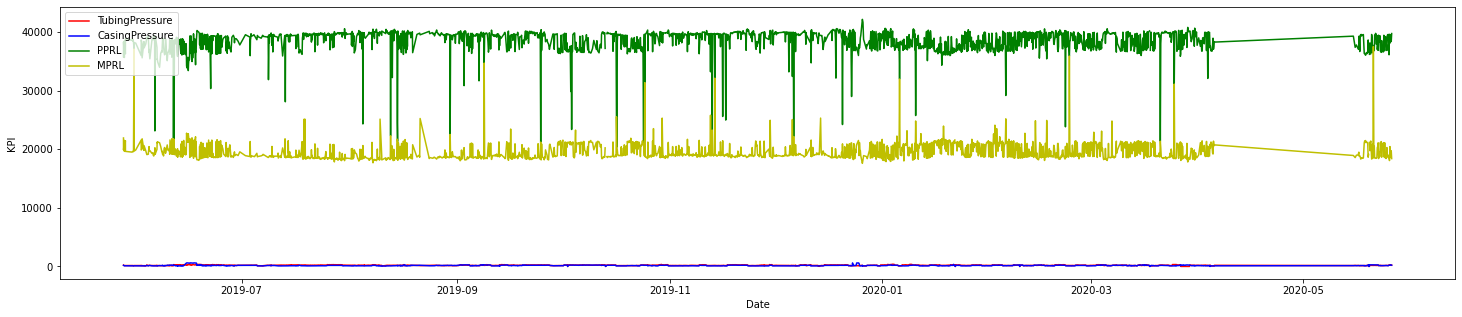

In [14]:
# PLot Kpis
# Col dict is the column name and the color
# Add or subtract columns if need be from the list of columns quried
col_dict = {
    'TubingPressure': 'r',
    'CasingPressure': 'b',
    'PPRL': 'g',
    'MPRL': 'y'
}

# Plotting
fig, ax = plt.subplots(figsize=(25,5))
for col, c in col_dict.items():
    ax.plot(well_data.Date, well_data.loc[:, col], color=c, label=col, alpha=1)

ax.set_xlabel("Date")
ax.set_ylabel("KPI")
ax.legend(loc='best')
plt.show()

In [ ]:
# SELECT THE COLUMN
col = 'TubingPressure'

"""
Resampling
"""
print("Initial Analysis for column: {}".format(col))
series = well_data.set_index('Date').loc[:,col]  # Get it as a series

print(series.describe())

print("\nPlot")
series.plot(figsize=(25, 5))
plt.show()

print("\nDay Resampled No fill")
series.resample('D').mean().plot(figsize=(25, 5))
plt.show()


# Resampling and Filling it up wiht limits
print("\n6H Resample, ffill with a limit of 1")
series.resample('6H').mean().ffill(limit=1).plot(figsize=(25,5))
plt.show()

In [ ]:
"""
Signal Decomposition
Will Have to eliminate nan values and have a constant frequency
"""
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 20, 12

# Using a 12H Freq, can play around with this
# Using ffill() to populate nan values, can also use fillna(0) to populate it with 0s
y = series.resample('12H').mean().ffill()
y.isnull().sum(axis=0)

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

### Unused Codes

In [ ]:
# """
# Get a list of tables in the database being checked
# """
# # Not needed, as we are using xdiagresults for now
# # query = """
# # SELECT table_name
# # FROM information_schema.tables
# # WHERE table_schema = 'xspoc'
# # ORDER BY table_name
# # """

# # with PostgresRDS(db=database) as engine:
# #     tables = pd.read_sql(query, engine)
    
# # display(tables)

In [ ]:
# # Basic
# d2 = data.dropna(axis=1, how='all', thresh=round(data.shape[0] * 0.9))  # Dropping all columns which have 90% Null values
# d2.info()

In [ ]:
# # Check Various Dtypes
# print("Object Datatype columns: \nList of Columns")
# print(d2.select_dtypes(include='object').columns.to_list())
# print('\nDataFrame')
# d2.select_dtypes(include='object').head()

In [ ]:
# print("Bool Datatype columns: \nList of Columns")
# print(d2.select_dtypes(include='bool').columns.to_list())
# print('\nDataFrame')
# d2.select_dtypes(include='bool').head()

In [ ]:
# print("Float Datatype columns: \nList of Columns")
# print(d2.select_dtypes(include='float64').columns.to_list())
# print('\nDataFrame')
# d2.select_dtypes(include='float64').head()
# print("\nDescription")
# d2.select_dtypes(include='float64').describe().T

In [ ]:
# print("Int Datatype columns: \nList of Columns")
# print(d2.select_dtypes(include='int64').columns.to_list())
# print('\nDataFrame')
# d2.select_dtypes(include='int64').head()
# print("\nDescription")
# d2.select_dtypes(include='int64').describe().T